In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

In [2]:
sam_checkpoint = "Checkpoints\sam_vit_h_4b8939.pth"
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to("cuda")
predictor = SamPredictor(sam)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Yara Elbakry\AppData\Local\Temp\ipykernel_25892\2509283395.py:1: SyntaxWarning: invalid escape sequence '\s'
  sam_checkpoint = "Checkpoints\sam_vit_h_4b8939.pth"


In [6]:
image = cv2.imread("Inputs\on table.jpg")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
predictor.set_image(image_rgb)

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Yara Elbakry\AppData\Local\Temp\ipykernel_25892\1634813762.py:1: SyntaxWarning: invalid escape sequence '\o'
  image = cv2.imread("Inputs\on table.jpg")


In [7]:
masks,_,_ = predictor.predict(point_coords=None,point_labels=None,multimask_output=True)

best = masks[np.argmax([mask.sum() for mask in masks])]
best = masks[2]

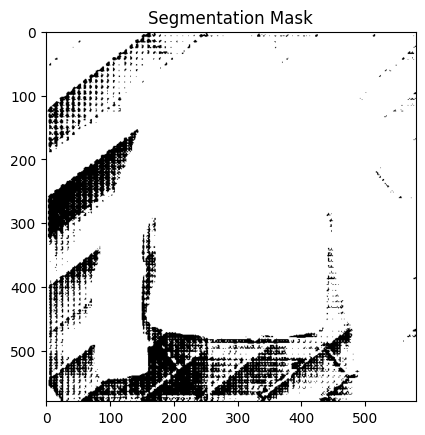

In [8]:
mask_uint8 = ((1-best) * 255).astype(np.uint8)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(mask_uint8, kernel, iterations=1)
plt.imshow(mask_uint8, cmap='gray')
plt.title("Segmentation Mask")
plt.show()

In [103]:
segmented_image = cv2.bitwise_and(image, image, mask=img_erosion)

cv2.imshow("Segmented Image", segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
cv2.imwrite("Outputs\Erroded jacket.jpg", segmented_image)

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_15944\1557717242.py:1: SyntaxWarning: invalid escape sequence '\E'
  cv2.imwrite("Outputs\Erroded jacket.jpg", segmented_image)


True